# Best Neighborhood Project

We used this dataset: Geocoded Food Facilities 
This contains a list of all food facilities in Allegheny County.


## Introduction
Everyone loves food. People from all over the world travel to get good food. When also looking for a new place to live or visit, people always search for attractions around them, and food attractions are definitely a common one. Those coming to live in or visit Pittsburgh may want to know where exactly has the best spots for food. We decided to measure the best neighborhood in Pittsburgh by solely basing it on food attractions that each zip code has to offer. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('geocoded locations pittsburgh.csv')

In [3]:
df.head()

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
0,10762,North Versailles VFD / South Wilmerding Social...,830,Sylvan Ave,North Versailles,PA,15137.0,North Versailles,250,Social Club-Bar Only,...,1969-01-01,NaN,60.0,NaN,NaN,1,1.0,-79.795408,40.389352,830 Sylvan Ave PA 15137
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,NaN,35.0,NaN,NaN,7,NaN,-79.863828,40.428111,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,1984-06-17,NaN,41.0,NaN,NaN,7,1.0,-80.039348,40.390970,3113 W Liberty Ave PA 15216
3,10707,Hyd A Way Bar,NaN,Box 39,Morgan,PA,15064.0,South Fayette,201,Restaurant with Liquor,...,1987-03-01,NaN,30.0,NaN,NaN,7,NaN,NaN,NaN,Box 39 PA 15064
4,10711,Bratstvo Lodge #6 SNPJ,540,3rd Avenue,Bridgeville,PA,15017.0,Bridgeville,201,Restaurant with Liquor,...,1984-06-17,NaN,75.0,NaN,NaN,1,1.0,-80.135185,40.355935,540 3rd Avenue PA 15017


In [4]:
df2 = df.drop(['num', 'category_cd', 'bus_st_date', 'bus_cl_date', 'seat_count', 'noroom', 'sq_feet', 
              'status', 'placard_st', 'x', 'y'], axis=1)

In [5]:
df2.head()

,id,facility_name,street,city,state,zip,municipal,description,p_code,fdo,address
0,10762,North Versailles VFD / South Wilmerding Social...,Sylvan Ave,North Versailles,PA,15137.0,North Versailles,Social Club-Bar Only,1.0,1969-01-01,830 Sylvan Ave PA 15137
1,10781,Hill Top Lodge #151,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,Social Club-Bar Only,7.0,1984-06-17,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,Restaurant with Liquor,2.0,1984-06-17,3113 W Liberty Ave PA 15216
3,10707,Hyd A Way Bar,Box 39,Morgan,PA,15064.0,South Fayette,Restaurant with Liquor,8.0,1987-03-01,Box 39 PA 15064
4,10711,Bratstvo Lodge #6 SNPJ,3rd Avenue,Bridgeville,PA,15017.0,Bridgeville,Restaurant with Liquor,1.0,1984-06-17,540 3rd Avenue PA 15017


In [9]:
column_name = 'city'  
word_to_remove = 'Pittsburgh'  

#here we are removing all the cities that aren't Pittsburgh

for index, row in df2.iterrows():
    if row[column_name] != word_to_remove:
        df2 = df2.drop(index)
        

In [10]:
df2.head()

,id,facility_name,street,city,state,zip,municipal,description,p_code,fdo,address
1,10781,Hill Top Lodge #151,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,Social Club-Bar Only,7.0,1984-06-17,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,Restaurant with Liquor,2.0,1984-06-17,3113 W Liberty Ave PA 15216
6,10734,Holiday Park Volunteer Fire Dept,Abers Creek Road,Pittsburgh,PA,15239.0,Plum,Firehall with Liquor,1.0,1957-01-01,415 Abers Creek Road PA 15239
11,10605,McArdle Tavern,Bingham Street,Pittsburgh,PA,15203.0,Pittsburgh-117,Restaurant with Liquor,1.0,1984-06-17,1600 Bingham Street PA 15203
12,10606,Arlington Vets Association,Arlington Ave,Pittsburgh,PA,15210.0,Pittsburgh-117,Social Club-Bar Only,2.0,1984-06-17,1751 Arlington Ave PA 15210


In [28]:
#Function that drops rows based on list of values

def drop_rows_by_value(df, column_name, values_to_drop):
    # iterate through rows in the specified column and drop matching rows
    for index, row in df.iterrows():
        if row[column_name] in values_to_drop:
            df.drop(index, inplace=True)

    # return the updated dataframe
    return df

In [34]:
list_remove = ['Chain Packaged Food Only', 'Retail/Convenience Store', 'Chain Retail/Convenience Store',
                'Chain Restaurant without Liquor', 'Personal Care Boarding Home/Fee Exempt', 'Church Kitchen', 
              'School Full Service Kitchen', 'School Full Service Kitchen/Exempt', 'Traditional Boarding Home/Fee Exempt',
              'Nursing Home/Personal Care Comb.', 'Mobile – Tier I (Unopened Pre-packaged Food Only', 
              'Traditional Boarding Home', 'Personal Care Boarding Home', 'Food Processor', 'Child Food Service', 
              'Packaged Food Only', 'Temporary', 'Mobile - Tier II ( Prepared Foods)', 'Commissary', 
              'Warehouse', 'Transient Retail Food Processor', 'Nursing Home', 'Chain Bakery', 'Rooming House with Guest food Service', 
              'Transient Caterer', 'Supermarket', 'Food Banks/ Food Pantries', 'Banquet Hall', 'Adult Food Service',
              'Bakery', 'Caterer', 'Nursing Home/Personal Care Snack Bar', 'Chain Supermarket', 'University Food Service', 
              'School Satellite kitchen', 'Hotels - Limited Menu Food Service', 'Seasonal/Farmers Market', 
              'School Satellite Kitchen/Exempt', 'Nursing Home/Fee Exempt', 'Rooming House/Fee Exempt', 'Child Food Service/Fee Exempt'
              , 'Community Service Facility', 'School Headstart', 'Hospital, Gov, University (limited)', 'Hospital/Other Institution', 
              'Nursing Home/Personal Care Comb./Fee Exempt', 'School Snack Bar/Fee Exempt', 'Temporary - Fee Exempt',
               'School Snack Bar', 'Seasonal', 'Pool Snack Bar - Exempt', 'Pool Snack Bar/With Liquor', 'FireHallwithout Liquor',
               'Nursing Home/Personal Care Snack Bar/Fee Exempt', 'Seasonal Pool Snack Bar', 'Pool Snack Bar/No liquor', 
               'Firehall with Liquor', 'School Satellite Kitchen', 'Mobile – Tier I (Unopened Pre-packaged Food Only)', 
              'Refrigerated Warehouse', 'University Food Service/Fee Exempt']

df = drop_rows_by_value(df2, 'description', list_remove)

In [35]:
df.head()

,id,facility_name,street,city,state,zip,municipal,description,p_code,fdo,address
1,10781,Hill Top Lodge #151,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,Social Club-Bar Only,7.0,1984-06-17,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,Restaurant with Liquor,2.0,1984-06-17,3113 W Liberty Ave PA 15216
11,10605,McArdle Tavern,Bingham Street,Pittsburgh,PA,15203.0,Pittsburgh-117,Restaurant with Liquor,1.0,1984-06-17,1600 Bingham Street PA 15203
12,10606,Arlington Vets Association,Arlington Ave,Pittsburgh,PA,15210.0,Pittsburgh-117,Social Club-Bar Only,2.0,1984-06-17,1751 Arlington Ave PA 15210
13,10636,Pittsburgh Golf Club Restaurant,Northumberland Street,Pittsburgh,PA,15217.0,Pittsburgh-114,Restaurant with Liquor,1.0,1986-01-01,5280 Northumberland Street PA 15217


## Main Metric

Our main metric was the amount of food and drink attraction ins each zip code. Yhese include restaurant with/without liquor social clu/bar only, and chain restaurant with liquor. We calculated the amount of attractions there are in each of 5 zip codes (data was organized by street and zip code. 

In [36]:
#Function that creates different dataframes based on zip codes

def filter_dataframe(df, column_name, numbers_to_check):
    
    matching_df = pd.DataFrame(columns=df.columns)

    
    for index, row in df.iterrows():
        if row[column_name] in numbers_to_check:
            
            matching_df = matching_df.append(row)

   
    return matching_df

In [37]:
df_15222 = filter_dataframe(df2, 'zip', [15222.0])
df_15219 = filter_dataframe(df2, 'zip', [15219])
df_15213 = filter_dataframe(df2, 'zip', [15213])
df_15203 = filter_dataframe(df2, 'zip', [15203])
df_15201 = filter_dataframe(df2, 'zip', [15201])

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matching_df.append(row)
/var/folders/d6/j558gmhj20dbkb4tkt7yhwk00000gn/T/ipykernel_5599/1427340534.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_df = matc

<AxesSubplot:>

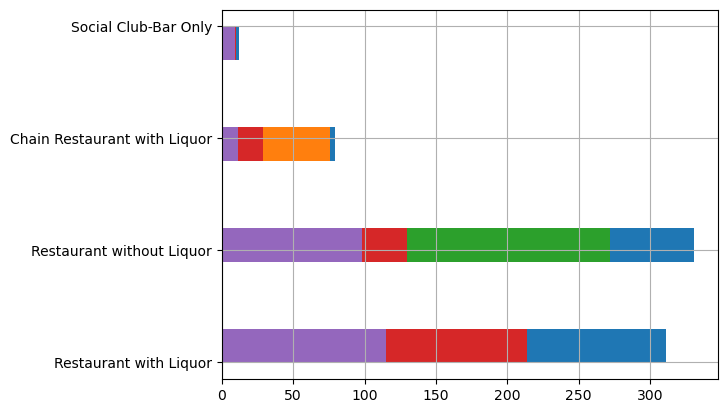

In [40]:
df_15222['description'].hist(orientation = 'horizontal')
df_15219['description'].hist(orientation = 'horizontal')
df_15213['description'].hist(orientation = 'horizontal')
df_15203['description'].hist(orientation = 'horizontal')
df_15201['description'].hist(orientation = 'horizontal')

In [41]:
import numpy as np
import matplotlib.pyplot as plt

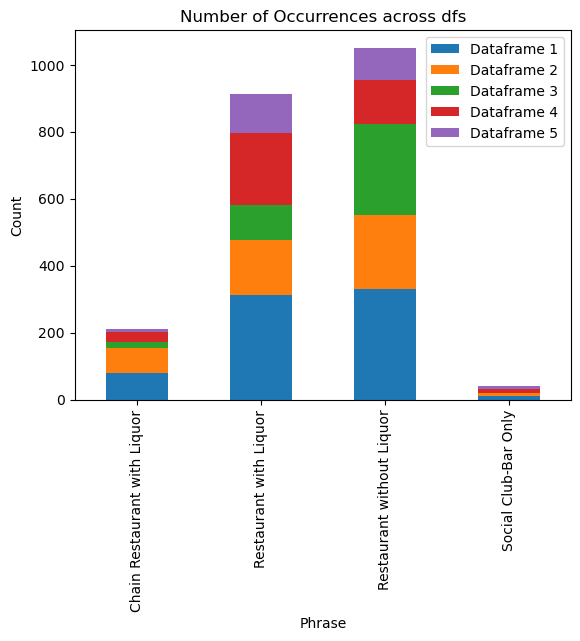

In [44]:
dfs = [df_15222, df_15219, df_15213, df_15203, df_15201]

# Initialize an empty dictionary to hold the counts for each phrase
d_counts = {}

# Loop through the dataframes and count the number of occurrences of each phrase
for i, df in enumerate(dfs):
    counts = df['description'].value_counts()
    d_counts[f'Dataframe {i+1}'] = counts

# Convert the dictionary to a dataframe
counts_df = pd.DataFrame(d_counts)

# Create a stacked bar chart of the counts
counts_df.plot(kind='bar', stacked=True)
plt.xlabel('Phrase')
plt.ylabel('Count')
plt.title('Number of Occurrences across dfs')
plt.show()





In [47]:
df_15222['description'].value_counts()

Restaurant without Liquor       331
Restaurant with Liquor          311
Chain Restaurant with Liquor     79
Social Club-Bar Only             12
Name: description, dtype: int64

Total Sum: 733

In [48]:
df_15219['description'].value_counts()

Restaurant without Liquor       220
Restaurant with Liquor          165
Chain Restaurant with Liquor     76
Social Club-Bar Only              7
Name: description, dtype: int64

Total Sum: 468

In [49]:
df_15213['description'].value_counts()

Restaurant without Liquor       272
Restaurant with Liquor          106
Chain Restaurant with Liquor     17
Social Club-Bar Only              2
Name: description, dtype: int64

Total Sum: 397

In [50]:
df_15203['description'].value_counts()

Restaurant with Liquor          214
Restaurant without Liquor       130
Chain Restaurant with Liquor     29
Social Club-Bar Only             10
Name: description, dtype: int64

Total Sum: 383

In [57]:
df_15201['description'].value_counts()

Restaurant with Liquor          115
Restaurant without Liquor        98
Chain Restaurant with Liquor     11
Social Club-Bar Only              9
Name: description, dtype: int64

Total Sum: 233

### Refresher on zip codes
- 15222 = Strip district + Downtown
- 15219 = Oakland
- 15213 = Squirrel Hill + Shadyside
- 15203 = South Side 
- 15201 = Lawrenceville

## Submetric #1

Amount of Social Clubs/Bar Only in Each Zip Code

Comparing values across the 5 dataframes of zip codes:

- df_15222 = 12
- df_15219 = 7
- df_15213 = 2
- df_15203 = 10
- df_15201 = 9

For the metric chosen the best zip code / cities would be 15222 which is strip district + doqntown

## Submetric #2
subMetric #2: Amount of Restaurants with Liquor in Each Zip Code

- df_15222 = 311
- df_15219 = 105
- df_15213 = 106
- df_15203 = 130
- df_15201 = 98

Based on the metrics chosen and the value counts added the zip code with the most restaurants with liquor was Strip district and Downtown